In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/exercise-machine-learning-competitions/__results__.html
/kaggle/input/exercise-machine-learning-competitions/__resultx__.html
/kaggle/input/exercise-machine-learning-competitions/__notebook__.ipynb
/kaggle/input/exercise-machine-learning-competitions/__output__.json
/kaggle/input/exercise-machine-learning-competitions/custom.css
/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/exercise-explore-your-data/__results__.html
/kaggle/input/exercise-explore-your-data/__output__.json
/kaggle/input/exercise-explore-your-data/custom.css


In [2]:
train_data = pd.read_csv("../input/home-data-for-ml-course/train.csv")
test_data = pd.read_csv("../input/home-data-for-ml-course/test.csv")


In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#Load dataset
iowa_file_path = '../input/home-data-for-ml-course/train.csv'
home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice

# Select features
features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF',
            '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd',
            'Fireplaces','MasVnrArea','GarageYrBlt','BsmtFinSF1','LotArea']
X = home_data[features].fillna(home_data[features].mean())

#Split into training and validation sets
train_X , val_X, train_y , val_y = train_test_split(X,y, random_state=1)

# Train model with restrictions to speed it up
model = DecisionTreeRegressor(random_state=1 , max_depth=8 , min_samples_leaf=5)
model.fit(train_X , train_y)

#Predict 
pred_train_y = model.predict(train_X)
pred_valid_y = model.predict(val_X)

#Evaluate MAE
mae_train = mean_absolute_error(train_y , pred_train_y)
mae_val = mean_absolute_error(val_y , pred_valid_y)

print(f"Mean Absolute Training Error : {mae_train:.2f}")
print(f"Mean Absolute Validatiion Error: {mae_val:.2f}")


Mean Absolute Training Error : 15589.46
Mean Absolute Validatiion Error: 22265.62


In [17]:
metrics_df.columns

Index(['Metric', 'Train', 'Validation'], dtype='object')

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

# === Additional Metrics ===
mse_train = mean_squared_error(train_y, pred_train_y)
mse_val = mean_squared_error(val_y, pred_valid_y)

rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)

rmsle_train = np.sqrt(mean_squared_error(np.log1p(train_y), np.log1p(np.maximum(pred_train_y, 0))))
rmsle_val = np.sqrt(mean_squared_error(np.log1p(val_y), np.log1p(np.maximum(pred_valid_y, 0))))

mape_train = np.mean(np.abs((train_y - pred_train_y) / train_y)) * 100
mape_val = np.mean(np.abs((val_y - pred_valid_y) / val_y)) * 100

r2_train = r2_score(train_y, pred_train_y)
r2_val = r2_score(val_y, pred_valid_y)

medae_train = median_absolute_error(train_y, pred_train_y)
medae_val = median_absolute_error(val_y, pred_valid_y)

# === Display neatly ===
metrics = {
    "Train": [mse_train, rmse_train, rmsle_train, mape_train, r2_train, medae_train],
    "Validation": [mse_val, rmse_val, rmsle_val, mape_val, r2_val, medae_val]
}

Error_df = pd.DataFrame(metrics , index = ["MSE", "RMSE", "RMSLE", "MAPE (%)", "R² Score", "Median AE"])
Error_df.index.name = "Metrix"

def format_number(x):
    if abs(x) >= 1e5:  # 5 digits or more
        return f"{x:.2e}"  # scientific notation
    else:
        return f"{x:.2f}"  # 2 decimals normally

# Apply formatting to Train and Validation columns
Error_df = Error_df.applymap(format_number)

print("\n========= Additional Regression Metrics =========")
display(Error_df)




========= Additional Regression Metrics =========


/tmp/ipykernel_37/4156569490.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Error_df = Error_df.applymap(format_number)


,Train,Validation
Metrix,,
MSE,5.93e+08,1.08e+09
RMSE,24359.37,32915.61
RMSLE,0.12,0.18
MAPE (%),9.07,13.83
R² Score,0.90,0.84
Median AE,10781.48,15389.71


In [32]:
# Save DataFrame
file_path = "/kaggle/working/Error.csv"
Error_df.to_csv(file_path, index=True)


In [21]:
import os
if os.path.exists(file_path):
    print(f"File successfully saved. Check the 'Output' panel to download: {file_path}")
else:
    print("File not found!")


File successfully saved. Check the 'Output' panel to download: /kaggle/working/metrics.csv


In [7]:
import numpy as np
from sklearn.metrics import accuracy_score 
import pandas as pd
import matplotlib.pyplot as plt

#Step: 1 Calculate Percentiles
p20 , p40 , p60 , p80 = np.percentile(y , [20,40,60,80])

#Step 2: Define Vectorized Class Conversion Function
def price_to_class(prices):
    classes = np.zeros_like(prices , dtype=int)
    classes[(prices>=p20) & (prices<p40)]=1
    classes[(prices>=p40) & (prices<p60)]=2
    classes[(prices>=p60) & (prices<p80)]=3
    classes[(prices>=p80)]=4
    return classes

#Step 3: Convert to Classes
valid_y_class = price_to_class(val_y.values)
pred_valid_y_class = price_to_class(pred_valid_y)

train_y_class = price_to_class(train_y.values)
pred_train_y_class = price_to_class(pred_train_y)

#Step 4: Accuracy
validAccuracy = accuracy_score(valid_y_class , pred_valid_y_class)
trainAccuracy = accuracy_score(train_y_class , pred_train_y_class)

print(f"\nOverall Accuracy from Validation Data : {validAccuracy*100:.2f}%")
print(f"Overall Accuracy form Training Data : {trainAccuracy*100:.2f}%")


Overall Accuracy from Validation Data : 64.66%
Overall Accuracy form Training Data : 72.33%


In [27]:
from sklearn.metrics import confusion_matrix
#Step 5 : Confusion Matrix
labels_names = ['Too Low' , 'Low' , 'Medium' , 'High','So High']
cm = confusion_matrix(valid_y_class , pred_valid_y_class)
cm_table = pd.DataFrame(cm ,columns=[f'Pred {l}' for l in labels_names] ,
                        index=[f'Actual {l}' for l in labels_names]
                       )

print("\nConfusion Matrix:\n",cm_table)


Confusion Matrix:
                 Pred Too Low  Pred Low  Pred Medium  Pred High  Pred So High
Actual Too Low            60        22            2          0             0
Actual Low                13        44            9          6             1
Actual Medium              4        17           41         17             0
Actual High                0         2           13         38             8
Actual So High             0         1            1         13            53


In [28]:
cm_table.to_csv("/kaggle/working/cm_table.csv", index=True)

In [33]:
from sklearn.metrics import  precision_score , recall_score , f1_score
#step 6:Precision , Recall , F1-score Table
precision = precision_score(valid_y_class , pred_valid_y_class,average=None)
recall = recall_score(valid_y_class , pred_valid_y_class,average=None)
f1 = f1_score(valid_y_class , pred_valid_y_class,average=None)

Performance_df = pd.DataFrame({
    'Precision (%)' : np.round(precision * 100, 2),
    'Recall (%)' : np.round(recall*100 , 2),
    'F1-Score (%) ': np.round(f1*100 , 2)
},index=labels_names)

Performance_df.index.name = "Class"
print("\nClassification Metrics per Class:\n")
print(Performance_df)



Classification Metrics per Class:

         Precision (%)  Recall (%)  F1-Score (%) 
Class                                            
Too Low          77.92       71.43          74.53
Low              51.16       60.27          55.35
Medium           62.12       51.90          56.55
High             51.35       62.30          56.30
So High          85.48       77.94          81.54


In [35]:
Performance_df.to_csv("/kaggle/working/Performance.csv", index=True)

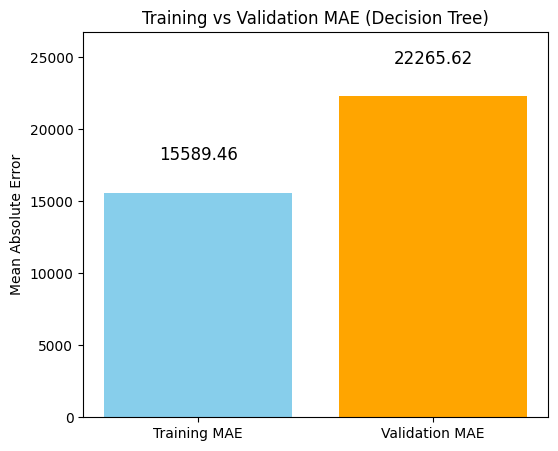

In [11]:
import matplotlib.pyplot as plt

# Create lists for plotting
mae_values = [mae_train, mae_val]
labels = ['Training MAE', 'Validation MAE']

# Create figure
plt.figure(figsize=(6, 5))

# Draw bar chart
bars = plt.bar(labels, mae_values, color=['skyblue', 'orange'])

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000, f'{yval:.2f}', 
             ha='center', va='bottom', fontsize=12)

# Labels and title
plt.ylabel("Mean Absolute Error")
plt.title("Training vs Validation MAE (Decision Tree)")
plt.ylim(0, max(mae_values)*1.2)

plt.show()
